In [1]:
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore", category=DeprecationWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)

import numpy as np
import pandas as pd

import string
import random
import time
import itertools
from tqdm import tqdm

tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [2]:
# data
data = pd.read_pickle("data/24_cleaned.pkl")

## Tfidf Vectorizer

In [3]:
df_top = pd.read_pickle("data/top6_24hu_clean.pkl")

In [10]:
tfidfvectorizer = TfidfVectorizer(analyzer="word",max_df = 0.3 ,min_df=0.005)

tfidf_wm = tfidfvectorizer.fit_transform(df_top["processed_text"])

tfidf_tokens = tfidfvectorizer.fit(df_top["processed_text"]).get_feature_names()

In [11]:
df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(), index = df_top.index, columns = tfidf_tokens)

In [15]:
print(list(df_tfidfvect.head().columns))

t', 'kerületi', 'kerülhet', 'került', 'ketten', 'kettő', 'kettős', 'keveredik', 'kevesebb', 'kevés', 'kevésbé', 'kezd', 'kezdeményez', 'kezdeményezés', 'kezdet', 'kezdv', 'kezdődik', 'kezdődő', 'kezel', 'kezelés', 'kiabál', 'kiad', 'kiadott', 'kiadás', 'kialakult', 'kialakulás', 'kialakítás', 'kiberbiztonsági', 'kiberbűnöző', 'kicsi', 'kiderít', 'kiderül', 'kiegészítő', 'kiemel', 'kiemelkedő', 'kiemelt', 'kifejezett', 'kifejezetten', 'kifejezés', 'kifejt', 'kifizet', 'kifizetés', 'kigyullad', 'kihallgat', 'kihallgatás', 'kihasznál', 'kihasználva', 'kihirdetés', 'kihívás', 'kijelent', 'kijelentés', 'kijelző', 'kijelölt', 'kijárási', 'kikötő', 'kilenc', 'kilogramm', 'kilométer', 'kilométeres', 'kilátás', 'kimegy', 'kimenetelű', 'kimond', 'kimutat', 'kimutatás', 'kinyit', 'kirabol', 'kis', 'kisebbség', 'kisfiú', 'kiskorú', 'kislány', 'kiszabott', 'kiszabás', 'kitér', 'kitörés', 'kivesz', 'kiváló', 'kivétel', 'kizár', 'kizárt', 'kizárólag', 'kiérkező', 'klinikai', 'kockázat', 'kocsi', 'kol

In [7]:
def fit_pca(features, standardize=True, n_components=5000):
    features = features.fillna(0)
    if standardize:
        features = (features - features.mean()) / features.std()
    decomposer = PCA(n_components=n_components)
    decomposer.fit(features)
    print(decomposer.explained_variance_ratio_)
    print(decomposer.explained_variance_ratio_.sum())
    transformed_data = decomposer.transform(features)
    return decomposer, features, transformed_data


decomposer, features_standardized, transformed_data_standardized = fit_pca(df_tfidfvect)

<AxesSubplot:xlabel='comp_1', ylabel='comp_2'>

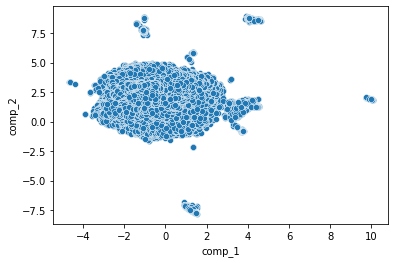

In [17]:
df = df_tfidfvect.copy()
reducer = umap.UMAP()
credit_data = df.values

scaled_credit_data = StandardScaler().fit_transform(credit_data)
embedding = pd.DataFrame(
    reducer.fit_transform(scaled_credit_data), columns=["comp_1", "comp_2"]
)
#embedding["LABEL"] = penguins["species_short"].values
sns.scatterplot(x="comp_1", y="comp_2", data=embedding)